In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)
plt.style.use("seaborn-v0_8")


In [2]:
numberofCities = 20
cities=[0] * numberofCities
for i in range(0, numberofCities):
    cities[i]=i

array_dis = np.loadtxt('uzaklık matrisi.csv', delimiter=',')

adjacency_mat = np.asarray(array_dis)

adjacency_mat

array([[     0. ,  51704.6, 111068.5,  95356. ,  61506.1,  61400.3,
         47459.7,  71910.1,  64599. , 108421.8,  44954.1,  72476.3,
        128862. , 117971.2,  56696.4,  69446. ,  32533.6, 121338.8,
         31318.5,  34229.9],
       [ 52344.7,      0. ,  71825.7,  56113.2,  22263.3,  22157.6,
          6232.4,  32667.4,  25356.3,  69179. ,  24540.8,  62704.4,
         89619.2,  78728.4,  26594.4,  30203.3,  32362.9,  82096.1,
         25244.1,  43204. ],
       [111159.1,  70564.7,      0. ,  41334.1,  64047.3,  53934.4,
         64541.3,  54254.4,  56245.2,  49501.6,  77504.3, 115667.9,
         69941.8,  42155.9,  82004.9,  83166.8,  89630.4,  62418.6,
         84058.5, 102018.4],
       [ 95437. ,  54842.6,  41334.1,      0. ,  48325.2,  38212.3,
         48819.2,  38532.3,  40523.1,  44092.4,  61782.2,  99945.8,
         64532.6,  53641.7,  66282.8,  67444.7,  73908.3,  57009.4,
         68336.4,  86296.3],
       [ 61439.9,  20845.5,  63913.6,  48201.1,      0. ,  14245.5,


In [3]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat


In [4]:
def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )


In [5]:
pop = init_population(cities, adjacency_mat, 20)
pop.bag


array([[ 0, 17, 15,  1,  8,  5, 11,  3, 18, 16, 13,  2,  9, 19,  4, 12,
         7, 10, 14,  6],
       [19, 16, 15,  5,  4, 12, 14,  7,  3,  6,  2,  9, 13, 10, 18,  8,
        17, 11,  0,  1],
       [10,  7,  0,  2,  5, 18, 16, 12,  4, 14, 15,  9,  1, 13, 11, 19,
         3, 17,  6,  8],
       [ 0, 18,  6,  8, 17, 11,  4,  9, 12, 10,  5, 19, 15,  7,  1,  3,
        16, 13,  2, 14],
       [ 5,  2, 10, 19,  0, 12,  9, 16,  1,  4, 17,  8, 11,  6, 18,  7,
        14, 15, 13,  3],
       [ 3,  1,  4,  5, 15, 16,  9, 10, 13,  2, 18, 19, 11, 17,  7,  8,
         6,  0, 12, 14],
       [13, 10, 12, 16,  9,  5,  3,  2,  4, 15, 14, 17,  0,  1, 11,  7,
        18, 19,  8,  6],
       [17, 18,  1,  5,  3, 15,  7, 11, 16,  8, 10, 12,  6,  9, 19,  0,
         2, 13, 14,  4],
       [17, 11,  7, 13,  0,  9,  4,  8,  1,  5,  2, 16, 19, 15,  3, 18,
        10, 14, 12,  6],
       [ 4,  9,  1, 15,  7,  5, 16,  2, 18,  3, 12, 17,  8, 14,  0, 13,
         6, 10, 19, 11],
       [ 2,  6, 16,  4, 17,  1

In [6]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness

In [7]:
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    self.score = np.min(distances)
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
Population.evaluate = evaluate

In [8]:
pop.evaluate()


array([0.05306746, 0.07400382, 0.02254931, 0.0730102 , 0.07495468,
       0.05397715, 0.03062666, 0.03671327, 0.02754776, 0.08322386,
       0.05091571, 0.        , 0.06350778, 0.01014023, 0.09377624,
       0.01161735, 0.04976336, 0.04185009, 0.09234769, 0.05640737])

In [9]:
pop.best

array([14, 16, 19, 13,  4, 12,  5,  7, 10,  1,  0, 15,  3,  8, 18, 11,  6,
        2,  9, 17])

In [10]:
pop.score

983391.4

In [11]:
def select(self, k=10):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

Population.select = select


In [12]:
pop.select()
pop.parents


array([[14, 16, 19, 13,  4, 12,  5,  7, 10,  1,  0, 15,  3,  8, 18, 11,
         6,  2,  9, 17],
       [14, 16, 19, 13,  4, 12,  5,  7, 10,  1,  0, 15,  3,  8, 18, 11,
         6,  2,  9, 17],
       [14,  7, 12,  6, 11,  4, 16,  9, 10,  0,  3,  8, 18,  5, 19,  1,
        13, 17,  2, 15],
       [14, 16, 19, 13,  4, 12,  5,  7, 10,  1,  0, 15,  3,  8, 18, 11,
         6,  2,  9, 17],
       [ 0, 18,  6,  8, 17, 11,  4,  9, 12, 10,  5, 19, 15,  7,  1,  3,
        16, 13,  2, 14],
       [ 4,  9,  1, 15,  7,  5, 16,  2, 18,  3, 12, 17,  8, 14,  0, 13,
         6, 10, 19, 11],
       [14, 16, 19, 13,  4, 12,  5,  7, 10,  1,  0, 15,  3,  8, 18, 11,
         6,  2,  9, 17],
       [ 5,  2, 10, 19,  0, 12,  9, 16,  1,  4, 17,  8, 11,  6, 18,  7,
        14, 15, 13,  3],
       [19, 16, 15,  5,  4, 12, 14,  7,  3,  6,  2,  9, 13, 10, 18,  8,
        17, 11,  0,  1],
       [ 0, 17, 15,  1,  8,  5, 11,  3, 18, 16, 13,  2,  9, 19,  4, 12,
         7, 10, 14,  6]])

In [13]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [14]:
def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

Population.crossover = crossover


In [15]:
def mutate(self, p_cross=0.1, p_mut=0.1):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate


In [16]:
pop.mutate()

[[0, 18, 6, 13, 4, 12, 5, 7, 8, 17, 11, 9, 10, 19, 15, 1, 3, 16, 2, 14],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [5, 2, 10, 19, 0, 12, 9, 16, 1, 4, 17, 8, 11, 6, 18, 7, 14, 15, 13, 3],
 [14, 19, 4, 12, 5, 7, 10, 1, 0, 16, 13, 2, 9, 15, 3, 8, 18, 11, 6, 17],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [14, 7, 12, 6, 11, 4, 16, 9, 10, 0, 3, 8, 18, 5, 19, 1, 13, 17, 2, 15],
 [14, 16, 19, 13, 2, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 4, 9, 17],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [4, 16, 19, 13, 14, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 18, 11, 6, 2, 9, 17],
 [14, 16, 19, 13, 4, 12, 5, 7, 10, 1, 0, 15, 3, 8, 

In [17]:
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=5,
    n_iter=0,
    selectivity=0.15,
    p_cross=0.7,
    p_mut=0.15,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best


Generation 0: 937488.6000000002
Generation 100: 645159.6
Generation 200: 598321.6
Generation 300: 588788.0
Generation 400: 588788.0
Generation 500: 567003.0000000001
Generation 600: 567002.9
Generation 700: 530646.5
Generation 800: 530646.5
Generation 900: 530646.5
Generation 1000: 530646.5
Generation 1100: 530646.5
Generation 1200: 530646.5
Generation 1300: 530646.5
Generation 1400: 500305.1
Generation 1500: 500305.1
Generation 1600: 500305.1
Generation 1700: 500305.1
Generation 1800: 500305.1
Generation 1900: 500305.1
Generation 2000: 486367.0
Generation 2100: 461273.5999999999
Generation 2200: 457743.39999999997
Generation 2300: 442274.29999999993
Generation 2400: 442274.29999999993
Generation 2500: 437990.5999999999
Generation 2600: 437990.5999999999
Generation 2700: 437990.5999999999
Generation 2800: 437990.5999999999
Generation 2900: 437990.5999999999


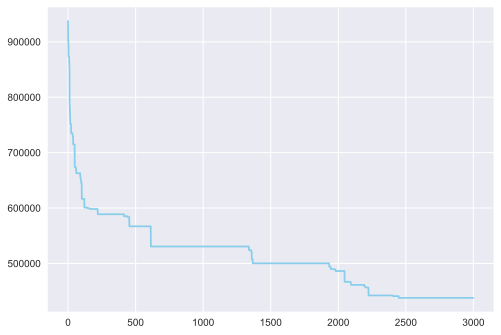

[0, 16, 18, 19, 11, 15, 10, 14, 1, 6, 4, 8, 5, 7, 3, 2, 13, 9, 17, 12]


In [18]:
 best, history = genetic_algorithm(
    cities, adjacency_mat, n_population=20, n_iter=3000, verbose=False, return_history=True
)
plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)


In [19]:
array_coordinates = np.loadtxt('CoordinatesforGeneticAlgorithm.csv',delimiter=',')
array_coordinates

array([[39.62094497, 28.31307225],
       [39.70846806, 27.90552465],
       [39.72126291, 27.36809935],
       [39.72796325, 27.59002781],
       [39.71119864, 27.81819135],
       [39.65795657, 27.78339323],
       [39.66749185, 27.89962301],
       [39.60783323, 27.67774131],
       [39.67257088, 27.76411155],
       [39.47055783, 27.37847627],
       [39.57897467, 27.99207129],
       [39.39549766, 28.24092665],
       [39.37840075, 27.25944496],
       [39.56323683, 27.31888073],
       [39.74198422, 27.979703  ],
       [39.50829483, 28.00298492],
       [39.72505889, 28.06697364],
       [39.42690718, 27.27340335],
       [39.68907785, 28.07618403],
       [39.56324697, 28.16493981]])

In [20]:
def print_path(best, array_coordinates):
    points = array_coordinates[best]
    y,x = zip(*points)
    print(array_coordinates[best])
    plt.plot(x, y, color="skyblue", marker="o")

[[39.62094497 28.31307225]
 [39.72505889 28.06697364]
 [39.68907785 28.07618403]
 [39.56324697 28.16493981]
 [39.39549766 28.24092665]
 [39.50829483 28.00298492]
 [39.57897467 27.99207129]
 [39.74198422 27.979703  ]
 [39.70846806 27.90552465]
 [39.66749185 27.89962301]
 [39.71119864 27.81819135]
 [39.67257088 27.76411155]
 [39.65795657 27.78339323]
 [39.60783323 27.67774131]
 [39.72796325 27.59002781]
 [39.72126291 27.36809935]
 [39.56323683 27.31888073]
 [39.47055783 27.37847627]
 [39.42690718 27.27340335]
 [39.37840075 27.25944496]]


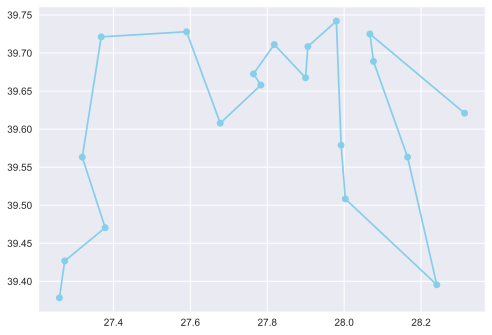

In [21]:
print_path(best, array_coordinates)

In [22]:
best_route = array_coordinates[best]

In [23]:
import folium
import jinja2

location_center=[39.64688,27.78862]
locations = best_route

m = folium.Map(location_center, zoom_start=9.5)
for location in locations:
    folium.Marker(
        location=location,
        popup = f'<input type="text" value="{location[0]}, {location[1]}" id="myInput"><button onclick="myFunction()">Copy location</button>'
    ).add_to(m)
    

folium.PolyLine(best_route, color="green", weight=2.5, opacity=1).add_to(m)
display(m)
